# compute AGI based on annual fields 
# present-day vs future
# use AGIcrit, Tpref, O2thresh as calculated from monthly hist. clim.
# accounting for model drift
#
# v2: use corrected calculation of habitat loss, print numbers of vertically integrated loss into figures
#
# Fig.5 in paper

In [1]:
#get_ipython().system(u'jupyter nbconvert --to=python plot_AGI_toothfish_testing.ipynb')

In [2]:

import xarray as xr
import numpy as np
import sys, os
from pathlib import Path
import glob
import matplotlib.pyplot as plt


In [3]:
#-----
# based on python code provided by Anne
#-----

basepath="/pscratch/sd/c/cnissen/AGI_toothfish_project/" 
no_species=29 

# Init
species_names         = [None] * no_species # empty list
species_names_        = [None] * no_species # empty list
habitat_file_names    = [None] * no_species # empty list
habitat_all = np.zeros([360,1440,no_species])

habitat_files = Path(basepath + "all_prey_plus_toothfish/").glob('*_boolean.nc')  # updated habitat files, Nov 2022!!!!!!
#habitat_files = Path(basepath + "share/").glob('*_boolean.nc') 
# Note: I changed name of file of Antimora_rostrata to *boolean2.nc, so that it won't be included here
for ifile,file in enumerate(habitat_files):   
    habitat_file_names[ifile]    = str(file)
    
    ff = xr.open_dataset(file)
    habitat_all[:,:,ifile] = ff['presence'].values 
    #if ifile==0:
    #    lat_tf  = ff['lat'].values 
    #    lon_tf  = ff['lon'].values 
    ff.close()
    
    # Get the species name from the full pathname with a space between
    species_names[ifile]  = '_'.join(os.path.basename(file).split('_')[:-2]).replace('_',' ') 
    if not species_names[ifile] in ['Galiteuthis glacialis','Mesonychoteuthis hamiltoni','Kondakovia longimana']:
        species_names[ifile] = species_names[ifile][8:] # get rid of "Default" or "Reviewed"
    if species_names[ifile][0].isspace():  # get rid of white space if there is any
        species_names[ifile] = species_names[ifile][1:]
    if species_names[ifile] in ['Chionobathyscus dewitti All Suitable Habitat']:
        species_names[ifile] = species_names[ifile][0:23]
    # Get the species name from the full pathname with _ in it
    species_names_[ifile] = species_names[ifile].replace(' ','_')  #'_'.join(os.path.basename(file).split('_')[:-2]) 

#print(habitat_file_names)
print(species_names)
print(len(species_names),'species')
print(species_names_)

# for plotting, set regions outside of habitat to negative number (so that they appear in white)
habitat_all[habitat_all==0] = -999
    
species_names_no_toothfish = ['Trematomus loennbergii', 'Macrourus whitsoni', 'Galiteuthis glacialis',\
                              'Chionodraco hamatus', 'Anotopterus vorax', 'Chaenodraco wilsoni',\
                              'Kondakovia longimana', 'Cryodraco antarcticus', 'Muraenolepis microps',\
                              'Psychroteuthis glacialis', 'Gymnodraco acuticeps', 'Amblyraja georgiana',\
                              'Antarctomysis maxima', 'Lepidonotothen squamifrons', 'Mesonychoteuthis hamiltoni',\
                              'Pleuragramma antarctica', 'Euphausia superba', 'Notothenia coriiceps',\
                              'Trematomus lepidorhinus', 'Pagothenia borchgrevinki', 'Lycenchelys aratrirostris',\
                              'Neopagetopsis ionah', 'Chaenocephalus aceratus', 'Trematomus hansoni',\
                              'Chionobathyscus dewitti', 'Euphausia crystallorophias', 'Notothenia rossii',\
                              'Bathyraja maccaini']
print (len(species_names_no_toothfish))


['Dissostichus mawsoni', 'Trematomus loennbergii', 'Macrourus whitsoni', 'Galiteuthis glacialis', 'Chionodraco hamatus', 'Anotopterus vorax', 'Chaenodraco wilsoni', 'Kondakovia longimana', 'Cryodraco antarcticus', 'Muraenolepis microps', 'Psychroteuthis glacialis', 'Gymnodraco acuticeps', 'Amblyraja georgiana', 'Antarctomysis maxima', 'Lepidonotothen squamifrons', 'Mesonychoteuthis hamiltoni', 'Pleuragramma antarctica', 'Euphausia superba', 'Notothenia coriiceps', 'Trematomus lepidorhinus', 'Pagothenia borchgrevinki', 'Lycenchelys aratrirostris', 'Neopagetopsis ionah', 'Chaenocephalus aceratus', 'Trematomus hansoni', 'Chionobathyscus dewitti', 'Euphausia crystallorophias', 'Notothenia rossii', 'Bathyraja maccaini']
29 species
['Dissostichus_mawsoni', 'Trematomus_loennbergii', 'Macrourus_whitsoni', 'Galiteuthis_glacialis', 'Chionodraco_hamatus', 'Anotopterus_vorax', 'Chaenodraco_wilsoni', 'Kondakovia_longimana', 'Cryodraco_antarcticus', 'Muraenolepis_microps', 'Psychroteuthis_glacialis'

In [35]:
#----
# load data
#----

# load drift-corrected files 
which_drift = '2091_2100' # 2081_2100, 2091_2100, 2098_2100 -> NOTE: only prepared for 2091_2100 at the moment!
drift_corr ='monthly_drift_corrected_'+which_drift+'_minus_1995_2014_v2' 

year_future1,year_future2 = int(which_drift[0:4]),int(which_drift[5:])

subregion = 'ALL_REGION' # ALL_REGION or ANTARCTIC_SHELF -> NOTE: ANTARCTIC_SHELF not yet prepared with corrected calculation!!!

path = '/pscratch/sd/c/cnissen/AGI_toothfish_project/habitat_loss/'

filename1 = 'Viable_habitat_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
                '_and_1995_2014_ssp126_all_depth_levels_'+drift_corr+'_CORRECTED_v20240129.nc'
filename2 = 'Viable_habitat_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
                '_and_1995_2014_ssp245_all_depth_levels_'+drift_corr+'_CORRECTED_v20240129.nc'
filename3 = 'Viable_habitat_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
                '_and_1995_2014_ssp370_all_depth_levels_'+drift_corr+'_CORRECTED_v20240129.nc'
filename4 = 'Viable_habitat_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
                '_and_1995_2014_ssp585_all_depth_levels_'+drift_corr+'_CORRECTED_v20240129.nc'
    
ff = xr.open_dataset(path+filename1)
data1  = ff['habitat_loss'].values 
depths = ff['depths'].values 
viable1 = ff['viable_habitat_present'].values # -> this is the same in every file, only load once!
viable2a = ff['viable_habitat_future'].values
ff.close()

ff = xr.open_dataset(path+filename2)
data2  = ff['habitat_loss'].values 
viable2b = ff['viable_habitat_future'].values
ff.close()

ff = xr.open_dataset(path+filename3)
data3  = ff['habitat_loss'].values 
viable2c = ff['viable_habitat_future'].values
ff.close()

ff = xr.open_dataset(path+filename4)
data4  = ff['habitat_loss'].values 
viable2d = ff['viable_habitat_future'].values
ff.close()

# get total viable habitat for present day and future (integrated over depth)
sum_habitat1 = np.nansum(viable1/1e15,axis=1) # -> this is the same in every file, only load once!
viable2a_int = np.nansum(viable2a/1e15,axis=1)
viable2b_int = np.nansum(viable2b/1e15,axis=1)
viable2c_int = np.nansum(viable2c/1e15,axis=1)
viable2d_int = np.nansum(viable2d/1e15,axis=1)

#ff = xr.open_dataset(path+filename5)
#data5  = ff['habitat_loss'].values 
#ff.close()

print(data1.shape)
print(depths.shape)

#---
# load numbers for shelf
#---
#filename1 = 'Habitat_loss_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
#                '_rel_to_1995_2014_ssp126_all_depth_levels_'+drift_corr+'_AntarcticShelf_only.nc'
#filename2 = 'Habitat_loss_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
#                '_rel_to_1995_2014_ssp245_all_depth_levels_'+drift_corr+'_AntarcticShelf_only.nc'
#filename3 = 'Habitat_loss_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
#                '_rel_to_1995_2014_ssp370_all_depth_levels_'+drift_corr+'_AntarcticShelf_only.nc'
#filename4 = 'Habitat_loss_'+str(int(which_drift[0:4]))+'_'+str(int(which_drift[5:]))+\
#                '_rel_to_1995_2014_ssp585_all_depth_levels_'+drift_corr+'_AntarcticShelf_only.nc'
##filename5 = 'Habitat_loss_2090_2099_rel_to_1995_2014_simB_all_depth_levels_AntarcticShelf_only.nc'
#    
#ff = xr.open_dataset(path+filename1)
#data1b  = ff['habitat_loss'].values 
#ff.close()
#
#ff = xr.open_dataset(path+filename2)
#data2b  = ff['habitat_loss'].values 
#ff.close()
#
#ff = xr.open_dataset(path+filename3)
#data3b  = ff['habitat_loss'].values 
#ff.close()
#
#ff = xr.open_dataset(path+filename4)
#data4b  = ff['habitat_loss'].values 
#ff.close()
#
##ff = xr.open_dataset(path+filename5)
##data5b  = ff['habitat_loss'].values 
##ff.close()
#
#print(data1b.shape)


(29, 88)
(88,)


In [6]:
#----
# Species information needed for calculation AGI
#----

# define order of species as contained in depth_min, LWa etc.
species_list = ['Cryodraco antarcticus','Neopagetopsis ionah','Trematomus lepidorhinus',\
               'Trematomus hansoni','Bathyraja maccaini','Chaenocephalus aceratus',\
               'Notothenia coriiceps','Pleuragramma antarctica','Dissostichus mawsoni',\
                'Macrourus whitsoni',\
               'Lepidonotothen squamifrons','Notothenia rossii','Muraenolepis microps',\
               'Chaenodraco wilsoni','Chionobathyscus dewitti',\
               'Galiteuthis glacialis','Mesonychoteuthis hamiltoni','Kondakovia longimana',\
               'Amblyraja georgiana','Anotopterus vorax','Antarctomysis maxima',\
               'Chionodraco hamatus','Euphausia crystallorophias','Euphausia superba','Gymnodraco acuticeps',\
               'Lycenchelys aratrirostris','Pagothenia borchgrevinki','Psychroteuthis glacialis',\
               'Trematomus loennbergii']
print(len(species_list))
# excluded the following species for now: 
# 1) Antimora rostrata: don't have the habitat file (habitat outside of SO)

# NO MAP Bathyraja eatonii	?		15	1500

# Minimum depth of occurence (meter)
depth_min     = [None] * len(species_names) # Initialize
depth_min[0]  = 90   # 'Cryodraco antarcticus'
depth_min[1]  = 20   #'Neopagetopsis ionah'
depth_min[2]  = 272    # 'Trematomus lepidorhinus'
depth_min[3]  = 6    # 'Trematomus hansoni'
depth_min[4]  = 167  # 'Bathyraja maccaini'
depth_min[5]  = 0    # 'Chaenocephalus aceratus'
depth_min[6]  = 0    # 'Notothenia coriiceps'
depth_min[7]  = 0    # 'Pleuragramma antarctica'
depth_min[8]  = 0    # 'Dissostichus mawsoni' ## Assume a wide range for toothfish (max. overlap with prey) ##
depth_min[9]  = 400  # 'Macrourus whitsoni'
depth_min[10] = 10   # 'Lepidonotothen squamifrons'
depth_min[11] = 5    # 'Notothenia rossii'
depth_min[12] = 10   # 'Muraenolepis microps'
depth_min[13] = 200  # 'Chaenodraco wilsoni'
depth_min[14] = 500  # 'Chionobathyscus dewitti'
depth_min[15] = 200   #'Galiteuthis glacialis'
depth_min[16] = 200   # 'Mesonychoteuthis hamiltoni'
depth_min[17] = 500   # 'Kondakovia longimana'
depth_min[18] = 57    # Amblyraja georgiana
depth_min[19] = 358  # Anotopterus vorax
depth_min[20] = 220 # Antarctomysis maxima
depth_min[21] = 76 # Chionodraco hamatus
depth_min[22] = 0 # Euphausia crystallorophias
depth_min[23] = 0 # Euphausia superba
depth_min[24] = 66 # Gymnodraco acuticeps
depth_min[25] = 244 # Lycenchelys aratrirostris
depth_min[26] = 0 # Pagothenia borchgrevinki
depth_min[27] = 385 # Psychroteuthis glacialis
depth_min[28] = 65 # Trematomus loennbergii
#depth_min[29] = # Trematomus eulepidotus #EXCLUDED

# Maximum depth of occurence (meter)
depth_max     = [None] * len(species_names) # Initialize
depth_max[0]  = 600  # 'Cryodraco antarcticus'
depth_max[1]  = 900  #'Neopagetopsis ionah'
depth_max[2]  = 468  # 'Trematomus lepidorhinus'
depth_max[3]  = 549  # 'Trematomus hansoni'
depth_max[4]  = 500  # 'Bathyraja maccaini'
depth_max[5]  = 770  # 'Chaenocephalus aceratus'
depth_max[6]  = 550  # 'Notothenia coriiceps'
depth_max[7]  = 1000 # 'Pleuragramma antarctica'
depth_max[8]  = 2210   # 'Dissostichus mawsoni' ## Assume a wide range for toothfish (max. overlap with prey) ##
depth_max[9]  = 3185 # 'Macrourus whitsoni'
depth_max[10] = 900  # 'Lepidonotothen squamifrons'
depth_max[11] = 350 # 'Notothenia rossii'
depth_max[12] = 1600 # 'Muraenolepis microps'
depth_max[13] = 800  # 'Chaenodraco wilsoni'
depth_max[14] = 2000 # 'Chionobathyscus dewitti'
depth_max[15] = 2500   #'Galiteuthis glacialis'
depth_max[16] =  600  # 'Mesonychoteuthis hamiltoni'
depth_max[17] = 2000   # 'Kondakovia longimana'
depth_max[18] = 173    # Amblyraja georgiana
depth_max[19] = 1059 # Anotopterus vorax
depth_max[20] = 440 # Antarctomysis maxima
depth_max[21] = 271 # Chionodraco hamatus
depth_max[22] = 650 # Euphausia crystallorophias
depth_max[23] = 600 # Euphausia superba
depth_max[24] = 247 # Gymnodraco acuticeps
depth_max[25] = 376 # Lycenchelys aratrirostris
depth_max[26] = 30 # Pagothenia borchgrevinki
depth_max[27] = 610 # Psychroteuthis glacialis
depth_max[28] = 832 # Trematomus loennbergii
#depth_max[29] = # Trematomus eulepidotus EXCLUDED

#---
# NOTE Jan 2023: this info below is not needed anymore with the new AGI formulation!
#----
## LWa extracted 21.07.2022 from FishBase
#LWa     = [None] * len(species_names) # Initialize
#LWa[0]  = 0.0007  # 'Cryodraco antarcticus'
#LWa[1]  = 0.01863  #'Neopagetopsis ionah'
#LWa[2]  = 0.0042  # 'Trematomus eulepidotus'
#LWa[3]  = 0.0021  # 'Trematomus hansoni'
#LWa[4]  = 0.00477  # 'Bathyraja maccaini'
#LWa[5]  = 0.0006 # 'Chaenocephalus aceratus'
#LWa[6]  = 0.0132  # 'Notothenia coriiceps'
#LWa[7]  = 0.0019  # 'Pleuragramma antarctica'
#LWa[8]  = 0.0045   # 'Dissostichus mawsoni'
#LWa[9]  = 0.0135 # 'Macrourus whitsoni'
#LWa[10] = 0.0027  # 'Lepidonotothen squamifrons'
##LWa[11] = 0.001     # 'Antimora rostrata'
#LWa[11] = 0.0093 # 'Notothenia rossii'
#LWa[12] = 0.00437 # 'Muraenolepis microps'
#LWa[13] = 0.0005  # 'Chaenodraco wilsoni'
#LWa[14] = 0.0012 # 'Chionobathyscus dewitti'

## LWb extracted 21.07.2022 from FishBase
#LWb     = [None] * len(species_names) # Initialize
#LWb[0]  = 3.51  # 'Cryodraco antarcticus'
#LWb[1]  = 2.762  #'Neopagetopsis ionah'
#LWb[2]  = 3.32  # 'Trematomus eulepidotus'
#LWb[3]  = 3.52  # 'Trematomus hansoni'
#LWb[4]  = 3.162  # 'Bathyraja maccaini'
#LWb[5]  = 3.63  # 'Chaenocephalus aceratus'
#LWb[6]  = 3.09  # 'Notothenia coriiceps'
#LWb[7]  = 3.41  # 'Pleuragramma antarctica'
#LWb[8]  = 3.24   # 'Dissostichus mawsoni'
#LWb[9]  = 3.15 # 'Macrourus whitsoni'
#LWb[10] = 3.41  # 'Lepidonotothen squamifrons'
##LWb[11] = 3.52   # 'Antimora rostrata'
#LWb[11] = 3.07 # 'Notothenia rossii'
#LWb[12] = 3.11 # 'Muraenolepis microps'
#LWb[13] = 3.79  # 'Chaenodraco wilsoni'
#LWb[14] = 3.5 # 'Chionobathyscus dewitti'

## Linf extracted 21.07.2022 from FishBase
## * Linf estimated from Lmax using Froese and Binohlan (2000) Eq. (5).
#Linf     = [None] * len(species_names) # Initialize
#Linf[0]  = 50.66374052  # 'Cryodraco antarcticus'*
#Linf[1]  = 58.12886422  #'Neopagetopsis ionah'*
#Linf[2]  = 26.5  # 'Trematomus eulepidotus'
#Linf[3]  = 36.5  # 'Trematomus hansoni'
#Linf[4]  = 123.061517  # 'Bathyraja maccaini'*
#Linf[5]  = 70.4  # 'Chaenocephalus aceratus'
#Linf[6]  = 62  # 'Notothenia coriiceps'
#Linf[7]  = 25.1  # 'Pleuragramma antarctica'
#Linf[8]  = 183   # 'Dissostichus mawsoni'
#Linf[9]  = 92 # 'Macrourus whitsoni'
#Linf[10] = 56.7  # 'Lepidonotothen squamifrons'
##Linf[11] = 66   # 'Antimora rostrata'
#Linf[11] = 87 # 'Notothenia rossii'
#Linf[12] = 36.60305736 # 'Muraenolepis microps'*
#Linf[13] = 44.82252387  # 'Chaenodraco wilsoni'*
#Linf[14] = 62.21264207 # 'Chionobathyscus dewitti'*


29


In [23]:
print(viable2d_int.shape)

(29,)


In [36]:
#---
# sort all variables to plot by depth_min
#---

#!!!!!!!!
# NOTE: depth_min is sorted according to species_list
#       data_* is sorted according to species_names
#!!!!!!!!
# Be very careful when sorting the arrays!!
# (that's why there is currently lots of output printed to the screen)

# get index of toothfish
#ind_toothfish = species_list.index('Dissostichus mawsoni')
# delete toothfish from list
#depth_min2 = np.delete(depth_min,ind_toothfish)
#depth_max2 = np.delete(depth_max,ind_toothfish)
#species_list2 = np.delete(species_list,ind_toothfish)
# sort all the others based on depth_min
ind_sort = np.argsort(depth_min)
depth_min2 = np.asarray(depth_min)[ind_sort]
depth_max2 = np.asarray(depth_max)[ind_sort]
species_list2 = np.asarray(species_list)[ind_sort]
# for plotting, add toothfish back to the list of labels
#species_list2 = np.hstack(('Dissostichus mawsoni',species_list2))
#print(species_list2)

data_ssp585_b = np.copy(data4)
data_ssp370_b = np.copy(data3)
data_ssp245_b = np.copy(data2)
data_ssp126_b = np.copy(data1)

viable2d_int_b = np.copy(viable2d_int)
viable2c_int_b = np.copy(viable2c_int)
viable2b_int_b = np.copy(viable2b_int)
viable2a_int_b = np.copy(viable2a_int)
sum_habitat1_b = np.copy(sum_habitat1)
#data_simB_b = np.copy(data5)

#data_ssp585_shelf_b = np.copy(data4b)
#data_ssp370_shelf_b = np.copy(data3b)
#data_ssp245_shelf_b = np.copy(data2b)
#data_ssp126_shelf_b = np.copy(data1b)
##data_simB_shelf_b = np.copy(data5b)

#index_list = np.zeros([len(species_names_no_toothfish)])
#for i in range(0,len(species_names_no_toothfish)):
#    index_list[i] = list(species_list2).index(species_names_no_toothfish[i])
#    #print(i,species_names_no_toothfish[i],iii,species_list2[iii])
#index_list = np.asarray([int(x) for x in index_list])

for i in range(0,len(species_names)):
    iii = list(species_list2).index(species_names[i])
    print(i,species_names[i],iii,species_list2[iii])
    data_ssp585_b[iii,:] = data4[i,:]
    data_ssp370_b[iii,:] = data3[i,:]
    data_ssp245_b[iii,:] = data2[i,:]
    data_ssp126_b[iii,:] = data1[i,:]
    
    viable2d_int_b[iii] = viable2d_int[i]
    viable2c_int_b[iii] = viable2c_int[i]
    viable2b_int_b[iii] = viable2b_int[i]
    viable2a_int_b[iii] = viable2a_int[i]
    sum_habitat1_b[iii] = sum_habitat1[i]

    #data_simB_b[iii,:]   = data5[i,:]
   # # shelf
   # data_ssp585_shelf_b[iii,:] = data4b[i,:]
   # data_ssp370_shelf_b[iii,:] = data3b[i,:]
   # data_ssp245_shelf_b[iii,:] = data2b[i,:]
   # data_ssp126_shelf_b[iii,:] = data1b[i,:]
   # #data_simB_shelf_b[iii,:]   = data5b[i,:]

file_mesh = '/pscratch/sd/c/cnissen/files_toothfish_project_AGI/Mesh_ancillary_information_v20220919.nc'
data_levels = xr.open_dataset(file_mesh)
levels      = data_levels['depth'].values # 88 levels
data_levels.close()

print('')
print(levels[5])
print('')
for mm in range(0,len(species_names)):
    print(species_names[mm],data4[mm,3])

print('')
for mm in range(0,len(species_list2)):
    print(species_list2[mm],data_ssp585_b[mm,3])


0 Dissostichus mawsoni 4 Dissostichus mawsoni
1 Trematomus loennbergii 13 Trematomus loennbergii
2 Macrourus whitsoni 26 Macrourus whitsoni
3 Galiteuthis glacialis 18 Galiteuthis glacialis
4 Chionodraco hamatus 15 Chionodraco hamatus
5 Anotopterus vorax 24 Anotopterus vorax
6 Chaenodraco wilsoni 19 Chaenodraco wilsoni
7 Kondakovia longimana 27 Kondakovia longimana
8 Cryodraco antarcticus 16 Cryodraco antarcticus
9 Muraenolepis microps 10 Muraenolepis microps
10 Psychroteuthis glacialis 25 Psychroteuthis glacialis
11 Gymnodraco acuticeps 14 Gymnodraco acuticeps
12 Amblyraja georgiana 12 Amblyraja georgiana
13 Antarctomysis maxima 21 Antarctomysis maxima
14 Lepidonotothen squamifrons 9 Lepidonotothen squamifrons
15 Mesonychoteuthis hamiltoni 20 Mesonychoteuthis hamiltoni
16 Pleuragramma antarctica 3 Pleuragramma antarctica
17 Euphausia superba 5 Euphausia superba
18 Notothenia coriiceps 2 Notothenia coriiceps
19 Trematomus lepidorhinus 23 Trematomus lepidorhinus
20 Pagothenia borchgrevin

In [30]:
#----
# plot
#----

ec = 'k'
color_line1 = 'k'
color_line2 = 'grey'
lw = 1 # for horizontal line: 100%
lw2 = 0.45 # for all other horizontal lines
width1 = 0.15
shift = 0.18
fs = 11
#xlim1,xlim2 = -0.25,len(depth_list1)-0.25
if subregion in ['ALL_REGION','ALL_REGIONS']:
    ylim1,ylim2  = -85,20 
elif subregion in ['ANTARCTIC_SHELF']:
    ylim1,ylim2  = -20,20 #-20,80
ms = 7
fs = 12

cm = plt.get_cmap('RdYlBu_r')
indc = np.arange(0,256+9,9)
print(indc.shape)
color_list = [cm(indc[0])[0:3],cm(indc[1])[0:3],cm(indc[2])[0:3],cm(indc[3])[0:3],cm(indc[4])[0:3],\
             cm(indc[5])[0:3],cm(indc[6])[0:3],cm(indc[7])[0:3],cm(indc[8])[0:3],cm(indc[9])[0:3],\
             cm(indc[10])[0:3],cm(indc[11])[0:3],cm(indc[12])[0:3],cm(indc[13])[0:3],cm(indc[14])[0:3],\
             cm(indc[15])[0:3],cm(indc[16])[0:3],cm(indc[17])[0:3],cm(indc[18])[0:3],cm(indc[19])[0:3],\
             cm(indc[20])[0:3],cm(indc[21])[0:3],cm(indc[22])[0:3],cm(indc[23])[0:3],cm(indc[24])[0:3],\
             cm(indc[25])[0:3],cm(indc[26])[0:3],cm(indc[27])[0:3],cm(indc[28])[0:3],cm(indc[29])[0:3]]

symbols_list = ['o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
                'o','s','*','<','P','d',\
               'o','s','*','<','P','d']

# Ross Sea colors
color_list1 = [(0./255.,59./255.,70./255.),(102./255.,165./255.,173./255.),(196./255.,223./255.,230./255.),\
                  (0.82,0.82,0.82)]
# eastAA colors
color_list2 = [(75./255.,116./255.,71./255.),(161./255.,190./255.,149./255.),(201./255.,209./255.,200./255.),\
                  (0.82,0.82,0.82)]
# Weddell Sea colors
color_list3 = [(26./255.,64./255.,95./255.),(51./255.,123./255.,174./255.),(208./255.,225./255.,249./255.),\
                  (0.82,0.82,0.82)]
# Orkney colors
color_list4 = [(164./255.,56./255.,32./255.),(238./255.,105./255.,36./255.),(248./255.,160./255.,85./255.),\
                  (0.82,0.82,0.82)]
# WAP colors
color_list5 = [(80./255.,49./255.,47./255.),(186./255.,168./255.,150./255.),(230./255.,204./255.,181./255.),\
                  (0.82,0.82,0.82)]
# grey scale 
color_list6 = [(0./255.,0./255.,0./255.),(75./255.,75./255.,75./255.),(150./255.,150./255.,150./255.),\
                  (0.82,0.82,0.82)]

color_list = np.copy(color_list1)

savepath1     = '/global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_loss/depth_profiles_with_drift_corr_v2/'
# check existence of paths
if not os.path.exists(savepath1):
    print ('Created '+savepath1)
    os.makedirs(savepath1)
    
savepath2     = savepath1+'eps/'
# check existence of paths
if not os.path.exists(savepath2):
    print ('Created '+savepath2)
    os.makedirs(savepath2)
    

(30,)


In [9]:
print(species_list2)

['Pagothenia borchgrevinki' 'Chaenocephalus aceratus'
 'Notothenia coriiceps' 'Pleuragramma antarctica' 'Dissostichus mawsoni'
 'Euphausia superba' 'Euphausia crystallorophias' 'Notothenia rossii'
 'Trematomus hansoni' 'Lepidonotothen squamifrons' 'Muraenolepis microps'
 'Neopagetopsis ionah' 'Amblyraja georgiana' 'Trematomus loennbergii'
 'Gymnodraco acuticeps' 'Chionodraco hamatus' 'Cryodraco antarcticus'
 'Bathyraja maccaini' 'Galiteuthis glacialis' 'Chaenodraco wilsoni'
 'Mesonychoteuthis hamiltoni' 'Antarctomysis maxima'
 'Lycenchelys aratrirostris' 'Trematomus lepidorhinus' 'Anotopterus vorax'
 'Psychroteuthis glacialis' 'Macrourus whitsoni' 'Kondakovia longimana'
 'Chionobathyscus dewitti']


1995-2014
2091-2100
2091-2100 minus 1995-2014
0 Pagothenia borchgrevinki
Habitat_change_depth_profile_Pagothenia_borchgrevinki_ALL_REGION_whole_SO_future_2091_2100.png


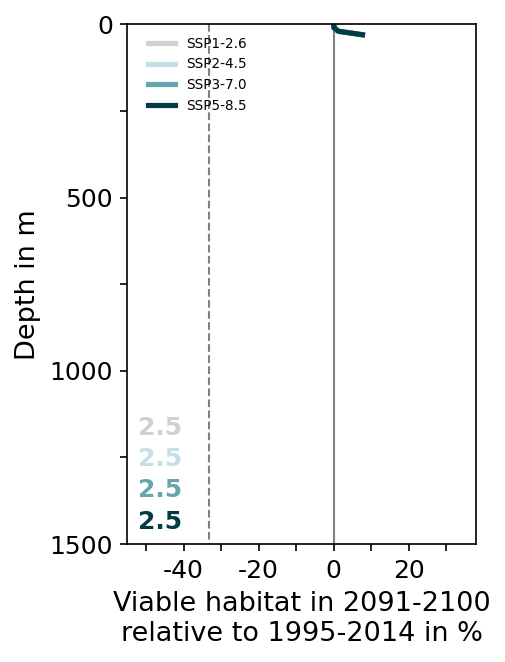

Habitat_change_depth_profile_Pagothenia_borchgrevinki_ALL_REGION_whole_SO_future_2091_2100.eps
1 Chaenocephalus aceratus
Habitat_change_depth_profile_Chaenocephalus_aceratus_ALL_REGION_whole_SO_future_2091_2100.png


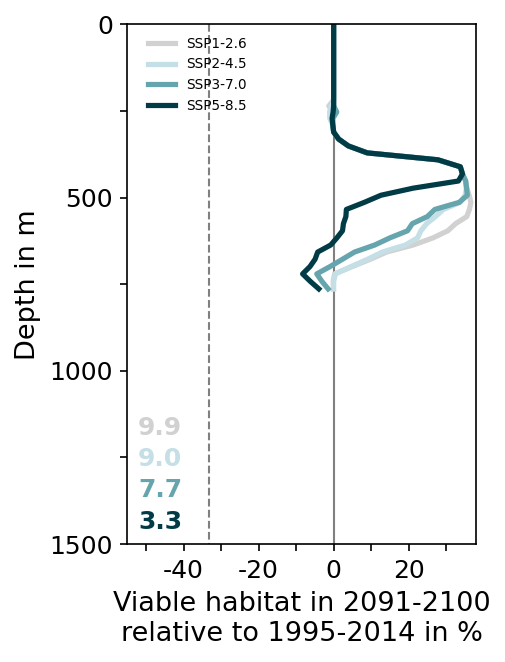

Habitat_change_depth_profile_Chaenocephalus_aceratus_ALL_REGION_whole_SO_future_2091_2100.eps
2 Notothenia coriiceps
Habitat_change_depth_profile_Notothenia_coriiceps_ALL_REGION_whole_SO_future_2091_2100.png


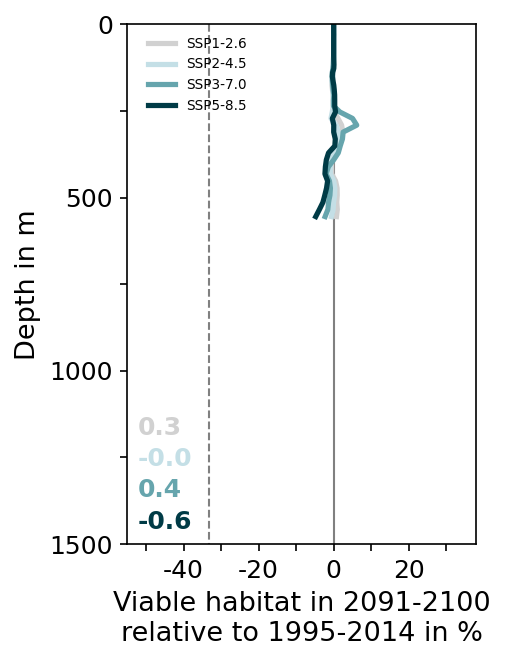

Habitat_change_depth_profile_Notothenia_coriiceps_ALL_REGION_whole_SO_future_2091_2100.eps
3 Pleuragramma antarctica
Habitat_change_depth_profile_Pleuragramma_antarctica_ALL_REGION_whole_SO_future_2091_2100.png


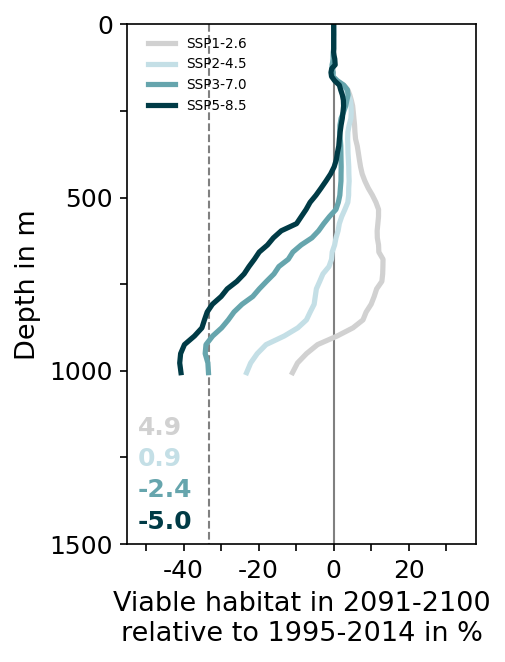

Habitat_change_depth_profile_Pleuragramma_antarctica_ALL_REGION_whole_SO_future_2091_2100.eps
4 Dissostichus mawsoni
Habitat_change_depth_profile_Dissostichus_mawsoni_ALL_REGION_whole_SO_future_2091_2100.png


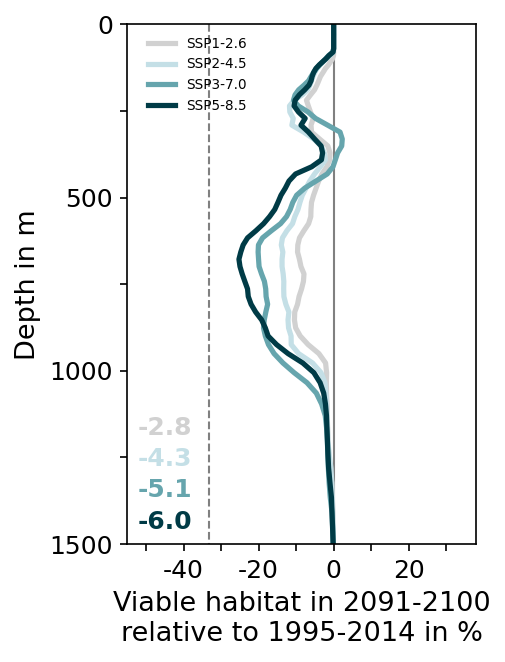

Habitat_change_depth_profile_Dissostichus_mawsoni_ALL_REGION_whole_SO_future_2091_2100.eps
5 Euphausia superba
Habitat_change_depth_profile_Euphausia_superba_ALL_REGION_whole_SO_future_2091_2100.png


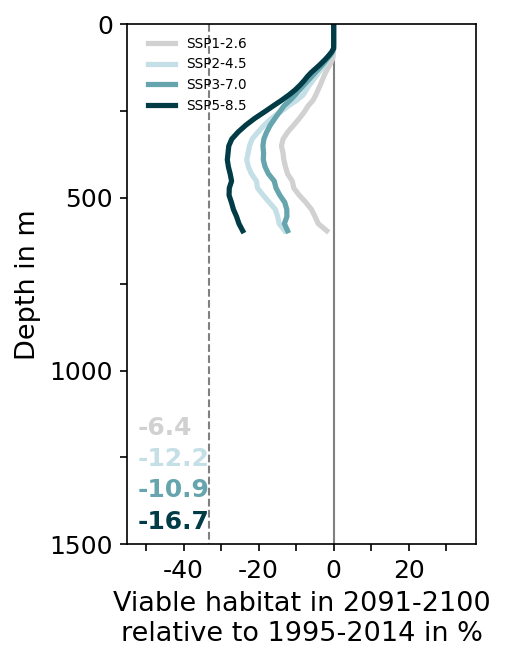

Habitat_change_depth_profile_Euphausia_superba_ALL_REGION_whole_SO_future_2091_2100.eps
6 Euphausia crystallorophias
Habitat_change_depth_profile_Euphausia_crystallorophias_ALL_REGION_whole_SO_future_2091_2100.png


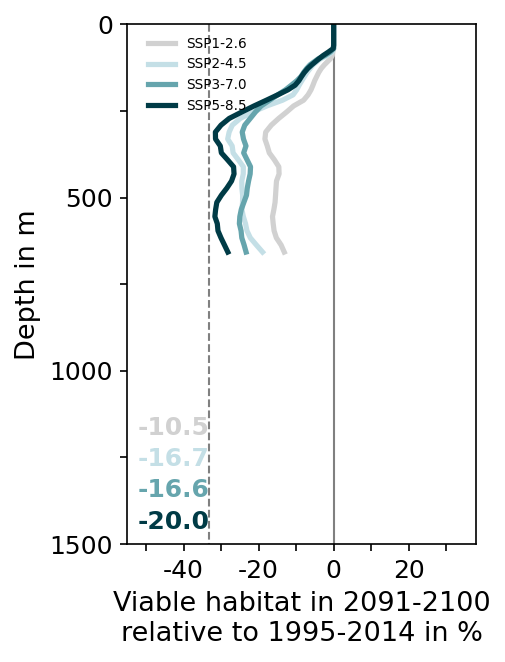

Habitat_change_depth_profile_Euphausia_crystallorophias_ALL_REGION_whole_SO_future_2091_2100.eps
7 Notothenia rossii
Habitat_change_depth_profile_Notothenia_rossii_ALL_REGION_whole_SO_future_2091_2100.png


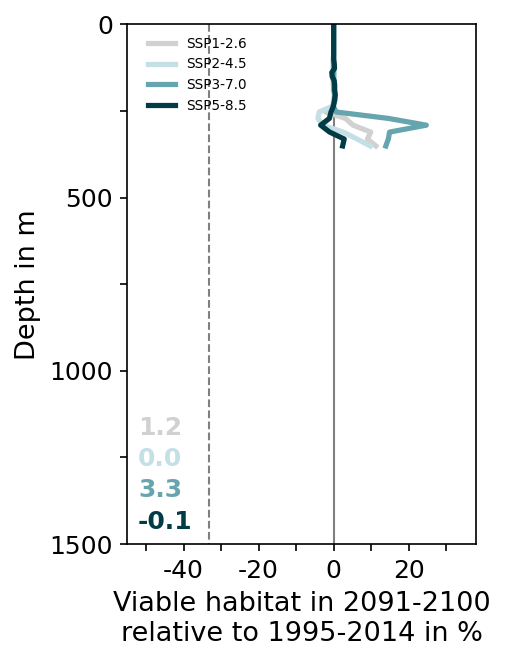

Habitat_change_depth_profile_Notothenia_rossii_ALL_REGION_whole_SO_future_2091_2100.eps
8 Trematomus hansoni
Habitat_change_depth_profile_Trematomus_hansoni_ALL_REGION_whole_SO_future_2091_2100.png


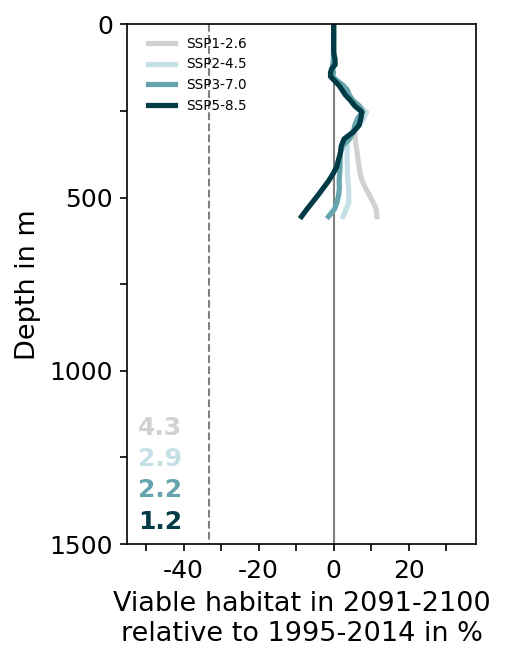

Habitat_change_depth_profile_Trematomus_hansoni_ALL_REGION_whole_SO_future_2091_2100.eps
9 Lepidonotothen squamifrons
Habitat_change_depth_profile_Lepidonotothen_squamifrons_ALL_REGION_whole_SO_future_2091_2100.png


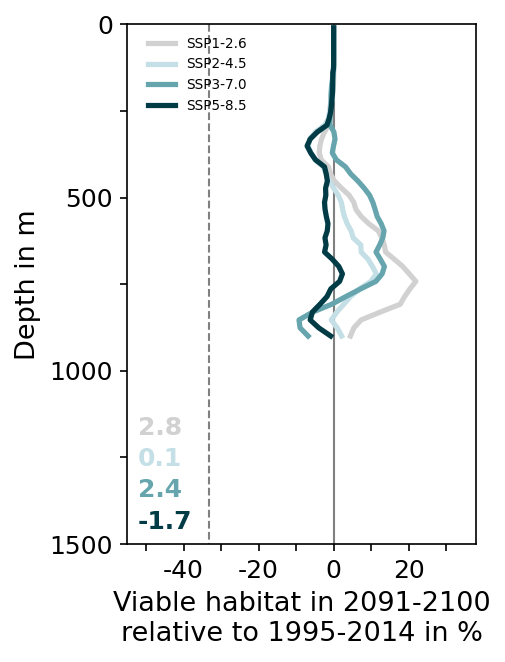

Habitat_change_depth_profile_Lepidonotothen_squamifrons_ALL_REGION_whole_SO_future_2091_2100.eps
10 Muraenolepis microps
Habitat_change_depth_profile_Muraenolepis_microps_ALL_REGION_whole_SO_future_2091_2100.png


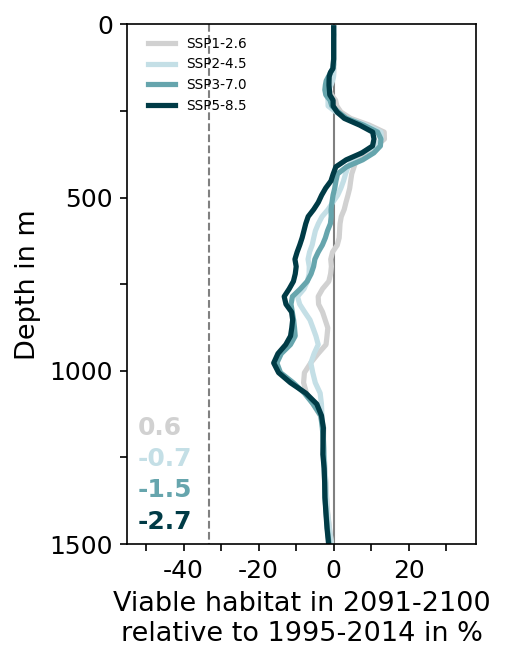

Habitat_change_depth_profile_Muraenolepis_microps_ALL_REGION_whole_SO_future_2091_2100.eps
11 Neopagetopsis ionah
Habitat_change_depth_profile_Neopagetopsis_ionah_ALL_REGION_whole_SO_future_2091_2100.png


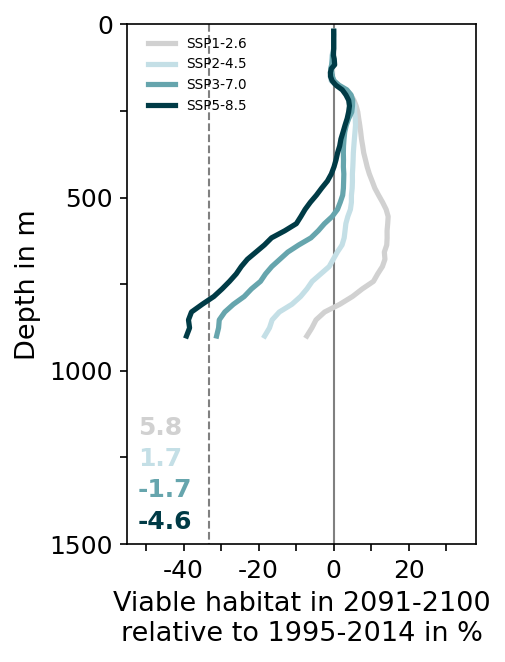

Habitat_change_depth_profile_Neopagetopsis_ionah_ALL_REGION_whole_SO_future_2091_2100.eps
12 Amblyraja georgiana
Habitat_change_depth_profile_Amblyraja_georgiana_ALL_REGION_whole_SO_future_2091_2100.png


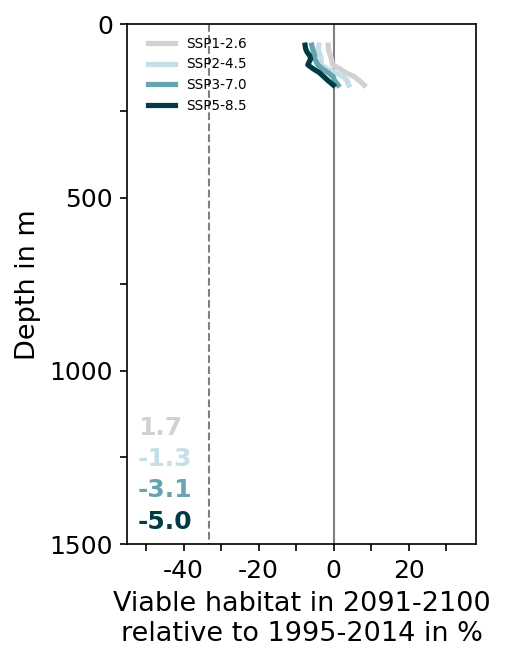

Habitat_change_depth_profile_Amblyraja_georgiana_ALL_REGION_whole_SO_future_2091_2100.eps
13 Trematomus loennbergii
Habitat_change_depth_profile_Trematomus_loennbergii_ALL_REGION_whole_SO_future_2091_2100.png


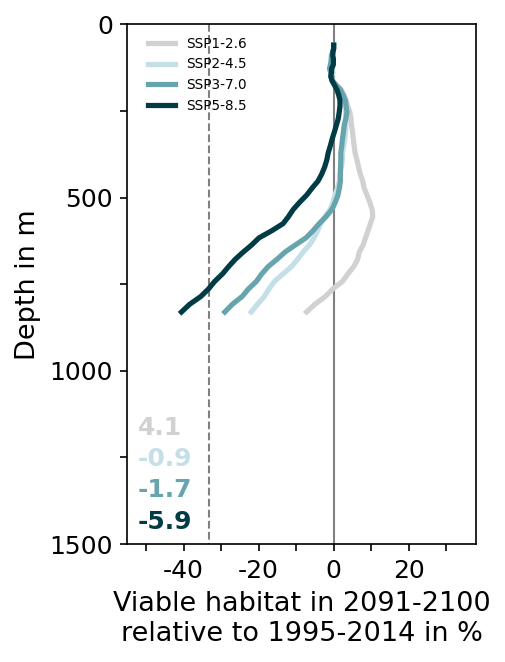

Habitat_change_depth_profile_Trematomus_loennbergii_ALL_REGION_whole_SO_future_2091_2100.eps
14 Gymnodraco acuticeps
Habitat_change_depth_profile_Gymnodraco_acuticeps_ALL_REGION_whole_SO_future_2091_2100.png


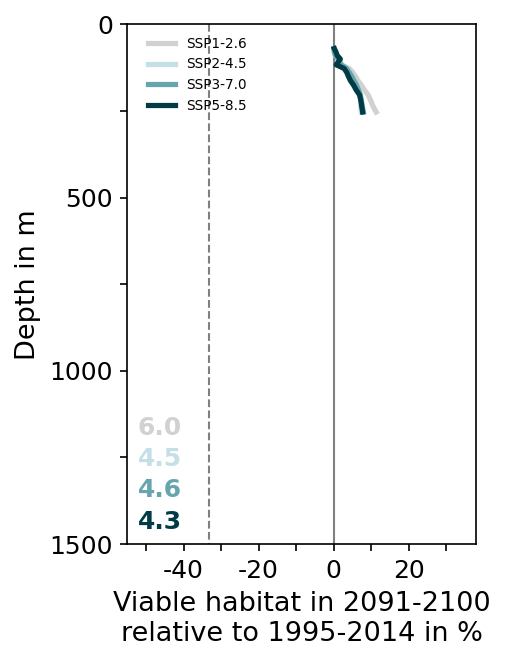

Habitat_change_depth_profile_Gymnodraco_acuticeps_ALL_REGION_whole_SO_future_2091_2100.eps
15 Chionodraco hamatus
Habitat_change_depth_profile_Chionodraco_hamatus_ALL_REGION_whole_SO_future_2091_2100.png


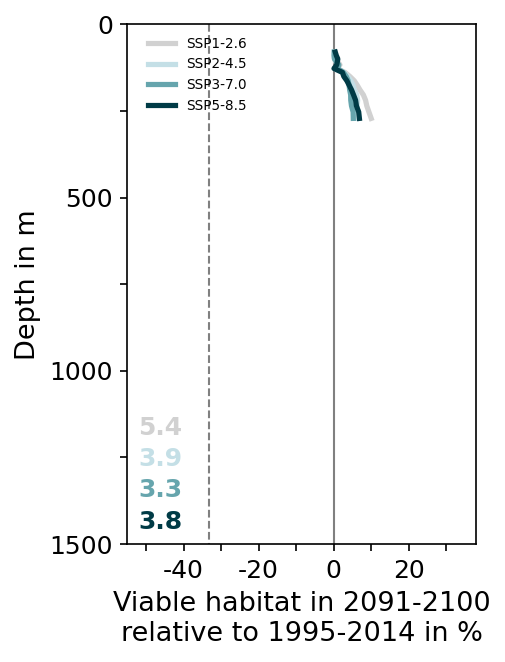

Habitat_change_depth_profile_Chionodraco_hamatus_ALL_REGION_whole_SO_future_2091_2100.eps
16 Cryodraco antarcticus
Habitat_change_depth_profile_Cryodraco_antarcticus_ALL_REGION_whole_SO_future_2091_2100.png


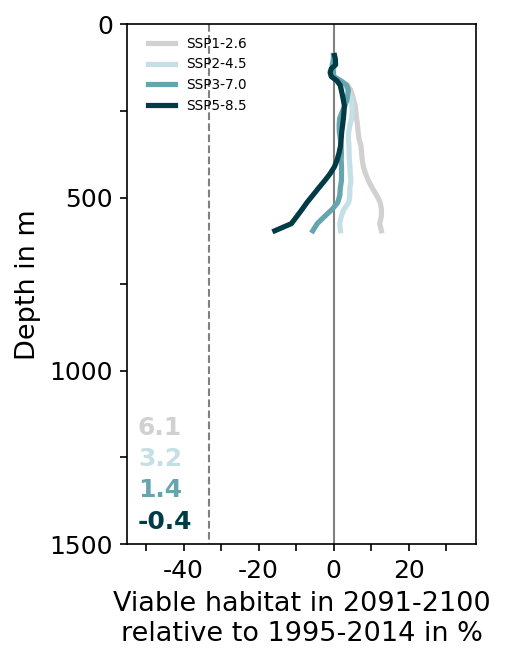

Habitat_change_depth_profile_Cryodraco_antarcticus_ALL_REGION_whole_SO_future_2091_2100.eps
17 Bathyraja maccaini
Habitat_change_depth_profile_Bathyraja_maccaini_ALL_REGION_whole_SO_future_2091_2100.png


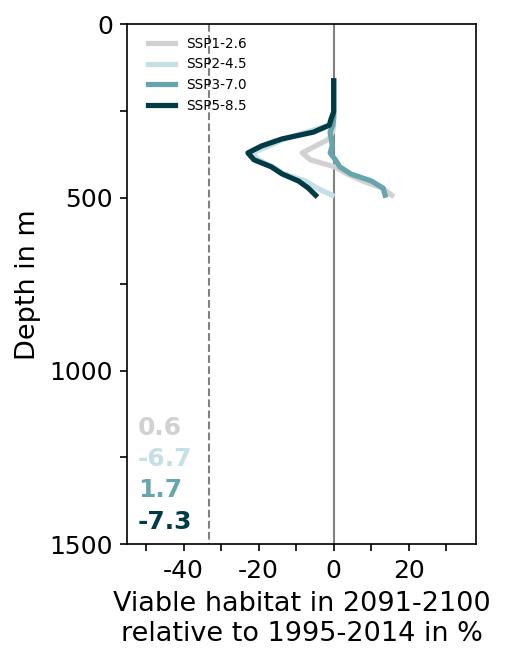

Habitat_change_depth_profile_Bathyraja_maccaini_ALL_REGION_whole_SO_future_2091_2100.eps
18 Galiteuthis glacialis
Habitat_change_depth_profile_Galiteuthis_glacialis_ALL_REGION_whole_SO_future_2091_2100.png


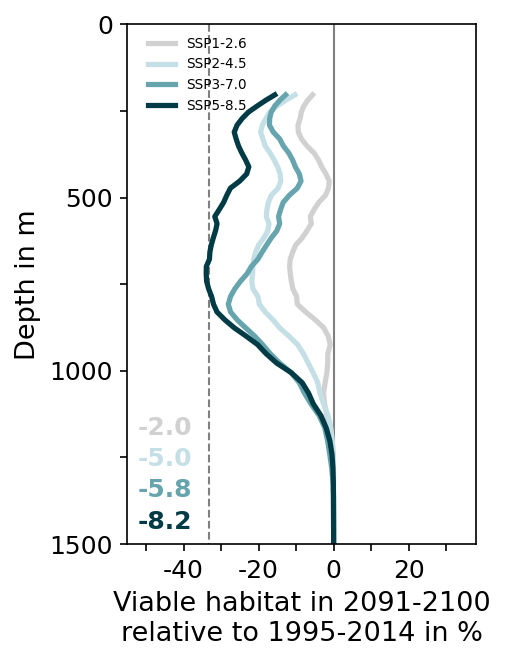

Habitat_change_depth_profile_Galiteuthis_glacialis_ALL_REGION_whole_SO_future_2091_2100.eps
19 Chaenodraco wilsoni
Habitat_change_depth_profile_Chaenodraco_wilsoni_ALL_REGION_whole_SO_future_2091_2100.png


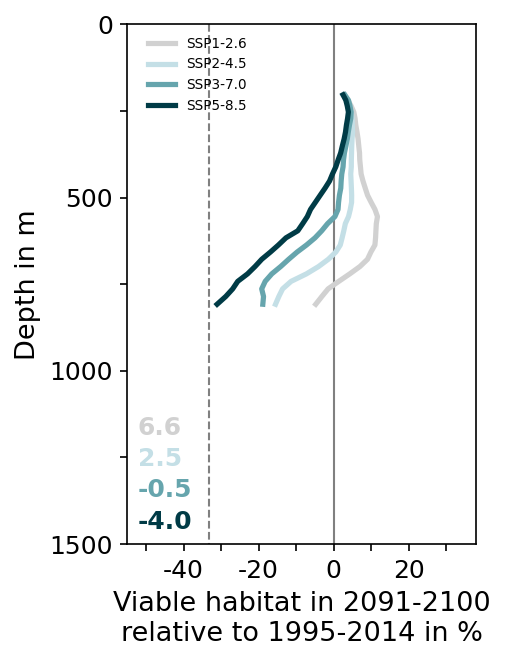

Habitat_change_depth_profile_Chaenodraco_wilsoni_ALL_REGION_whole_SO_future_2091_2100.eps
20 Mesonychoteuthis hamiltoni
Habitat_change_depth_profile_Mesonychoteuthis_hamiltoni_ALL_REGION_whole_SO_future_2091_2100.png


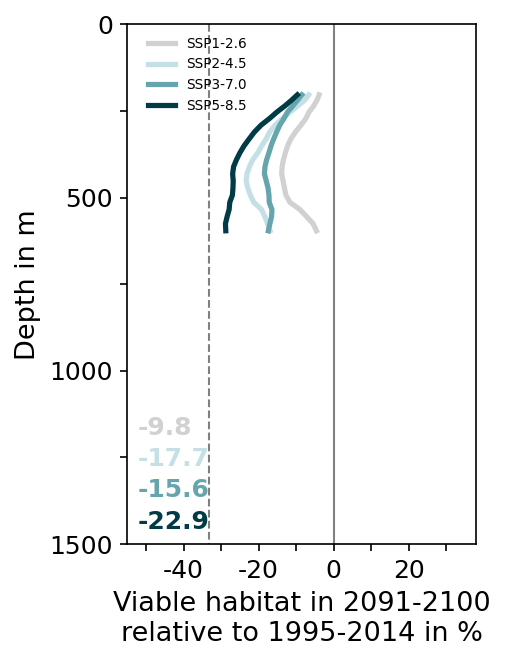

Habitat_change_depth_profile_Mesonychoteuthis_hamiltoni_ALL_REGION_whole_SO_future_2091_2100.eps
21 Antarctomysis maxima
Habitat_change_depth_profile_Antarctomysis_maxima_ALL_REGION_whole_SO_future_2091_2100.png


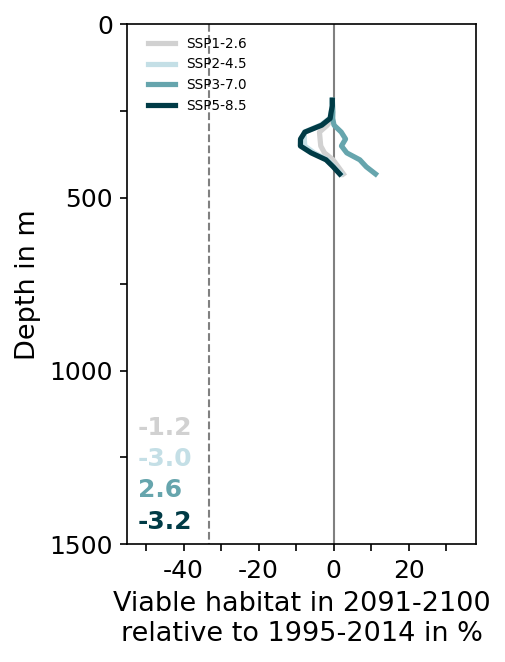

Habitat_change_depth_profile_Antarctomysis_maxima_ALL_REGION_whole_SO_future_2091_2100.eps
22 Lycenchelys aratrirostris
Habitat_change_depth_profile_Lycenchelys_aratrirostris_ALL_REGION_whole_SO_future_2091_2100.png


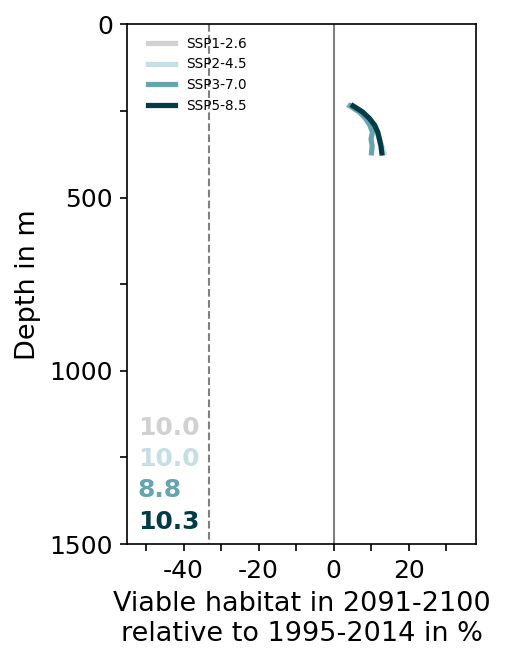

Habitat_change_depth_profile_Lycenchelys_aratrirostris_ALL_REGION_whole_SO_future_2091_2100.eps
23 Trematomus lepidorhinus
Habitat_change_depth_profile_Trematomus_lepidorhinus_ALL_REGION_whole_SO_future_2091_2100.png


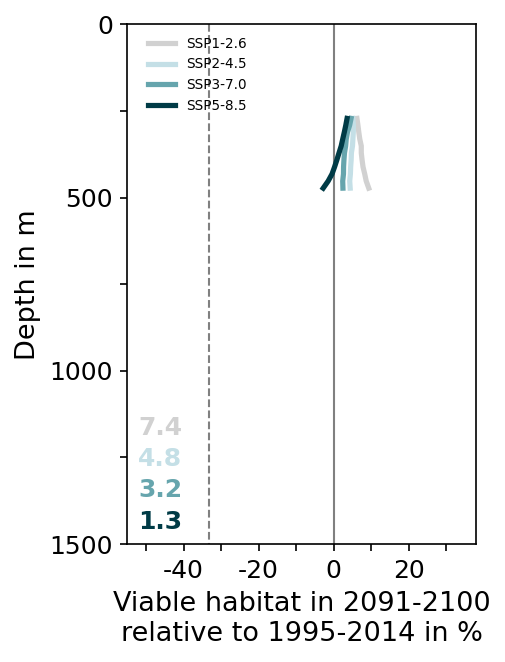

Habitat_change_depth_profile_Trematomus_lepidorhinus_ALL_REGION_whole_SO_future_2091_2100.eps
24 Anotopterus vorax
Habitat_change_depth_profile_Anotopterus_vorax_ALL_REGION_whole_SO_future_2091_2100.png


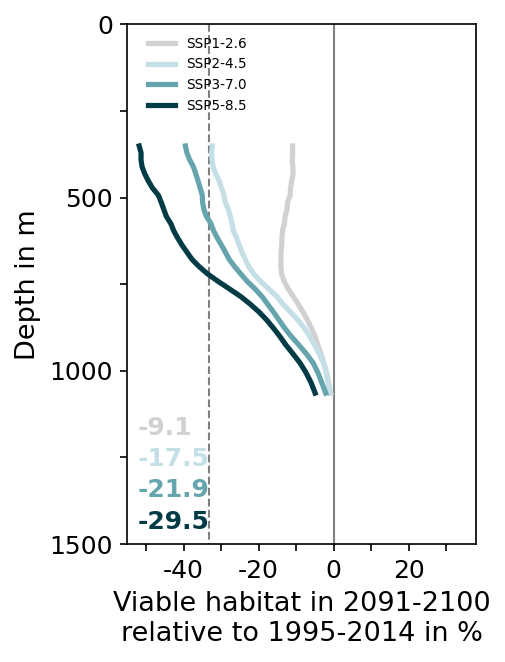

Habitat_change_depth_profile_Anotopterus_vorax_ALL_REGION_whole_SO_future_2091_2100.eps
25 Psychroteuthis glacialis
Habitat_change_depth_profile_Psychroteuthis_glacialis_ALL_REGION_whole_SO_future_2091_2100.png


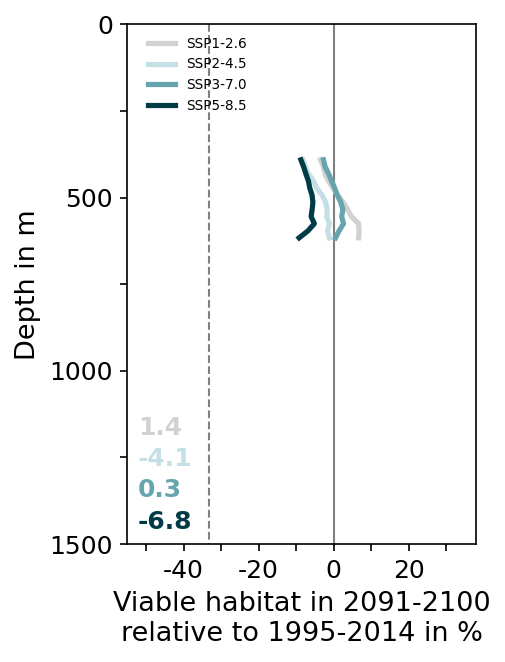

Habitat_change_depth_profile_Psychroteuthis_glacialis_ALL_REGION_whole_SO_future_2091_2100.eps
26 Macrourus whitsoni
Habitat_change_depth_profile_Macrourus_whitsoni_ALL_REGION_whole_SO_future_2091_2100.png


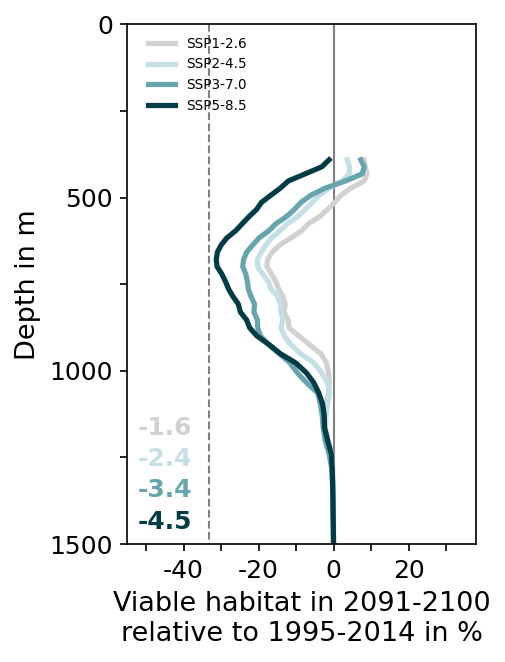

Habitat_change_depth_profile_Macrourus_whitsoni_ALL_REGION_whole_SO_future_2091_2100.eps
27 Kondakovia longimana
Habitat_change_depth_profile_Kondakovia_longimana_ALL_REGION_whole_SO_future_2091_2100.png


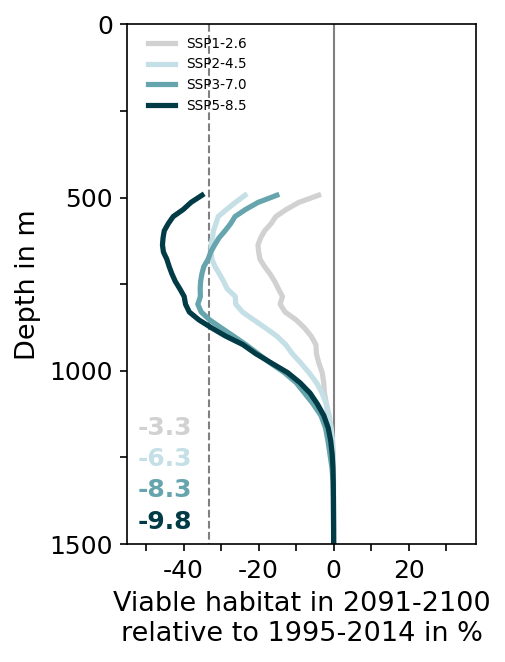

Habitat_change_depth_profile_Kondakovia_longimana_ALL_REGION_whole_SO_future_2091_2100.eps
28 Chionobathyscus dewitti
Habitat_change_depth_profile_Chionobathyscus_dewitti_ALL_REGION_whole_SO_future_2091_2100.png


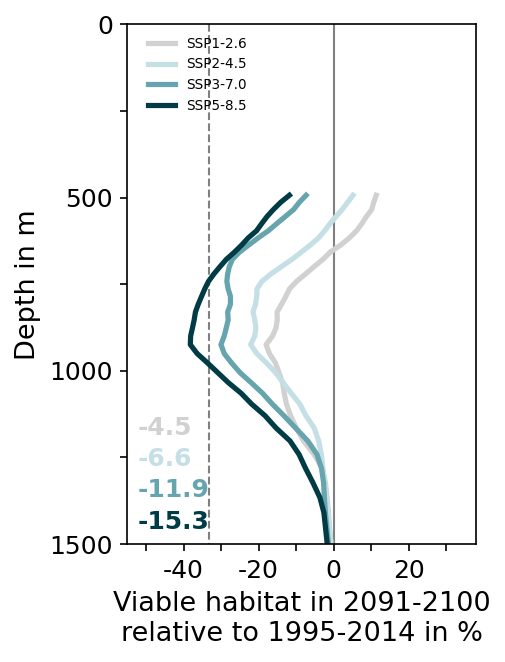

Habitat_change_depth_profile_Chionobathyscus_dewitti_ALL_REGION_whole_SO_future_2091_2100.eps
done


In [40]:
#---
# plot habitat change 
#---
    
factor = 1
ylim1,ylim2 = 0,1500 #2210
lw = 2.5
fs = 12

color_simB = 'k'

save_plots = True
display_plots = True

plot_eps = True
display_plots_eps = False


plot_with_shelf = False

time_String_hist   = '1995-2014'
time_String_future = str(int(which_drift[0:4]))+'-'+str(int(which_drift[5:]))
time_String_diff   = str(int(which_drift[0:4]))+'-'+str(int(which_drift[5:]))+' minus 1995-2014'
print(time_String_hist)
print(time_String_future)
print(time_String_diff)


for ss in range(0,len(species_list2)):
    print(ss,species_list2[ss])

    # figsize=(4,8)
    fig7, ax1 = plt.subplots(num=2, figsize=(3,4.5), dpi=150, facecolor='w', edgecolor='k')
    #plt.hlines(0,xlim1,xlim2,color='grey',linewidth=1)
    plt.vlines(0.0,ylim1,ylim2,color='grey',linestyle='-',linewidth=1)
    plt.vlines(-33.3333,ylim1,ylim2,color='grey',linestyle='--',linewidth=1)

    plt.plot(factor*data_ssp126_b[ss,:]-100,depths,color=color_list[3],linewidth=lw,label='SSP1-2.6')
    plt.plot(factor*data_ssp245_b[ss,:]-100,depths,color=color_list[2],linewidth=lw,label='SSP2-4.5')
    plt.plot(factor*data_ssp370_b[ss,:]-100,depths,color=color_list[1],linewidth=lw,label='SSP3-7.0')
    plt.plot(factor*data_ssp585_b[ss,:]-100,depths,color=color_list[0],linewidth=lw,label='SSP5-8.5')
    #plt.plot(factor*data_simB_b[ss,:],depths,color=color_simB,linewidth=lw-1,linestyle='-',label='simB',zorder=0)
      
    #if plot_with_shelf:
    #    plt.plot(factor*data_ssp126_shelf_b[ss,:],depths,color=color_list[3],linewidth=lw,linestyle=':')
    #    plt.plot(factor*data_ssp245_shelf_b[ss,:],depths,color=color_list[2],linewidth=lw,linestyle=':')
    #    plt.plot(factor*data_ssp370_shelf_b[ss,:],depths,color=color_list[1],linewidth=lw,linestyle=':')
    #    plt.plot(factor*data_ssp585_shelf_b[ss,:],depths,color=color_list[0],linewidth=lw,linestyle=':')
    #    #plt.plot(factor*data_simB_shelf_b[ss,:],depths,color=color_simB,linewidth=lw-1,linestyle=':',zorder=0)
    
    plt.xlim((-55,38))
    #plt.xlim((-83,20))
    plt.ylim((ylim1,ylim2))
    plt.gca().invert_yaxis()
    
    #if subregion in ['ALL_REGION','ALL_REGIONS']:
    #    plt.annotate('whole habitat',xy=(0.015,1.015),\
    #                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')
    #elif subregion in ['ANTARCTIC_SHELF']:
    #    plt.annotate('Habitat on Antarctic shelf',xy=(0.015,1.015),\
    #                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

    plt.xlabel('Viable habitat in '+time_String_future+'\nrelative to '+time_String_hist+' in %',fontsize=fs+1)
    plt.ylabel('Depth in m',fontsize=fs+1)
    #plt.yticks([0,250,500,750,1000,1250,1500,1750,2000],[0,'',500,'',1000,'',1500,'',2000],fontsize=fs)
    plt.yticks([0,250,500,750,1000,1250,1500],[0,'',500,'',1000,'',1500],fontsize=fs)
    if subregion in ['ALL_REGION','ALL_REGIONS']:
        plt.xticks([-50,-40,-30,-20,-10,0,10,20,30],['',-40,'',-20,'',0,'',20,''],fontsize=fs)
        #plt.xticks([-60,-50,-40,-30,-20,-10,0,10],[-60,'',-40,'',-20,'',0,''],fontsize=fs)
        #plt.xticks([-80,-60,-40,-20,0,20],[-80,-60,-40,-20,0,20],fontsize=fs)
    plt.legend(loc='upper center', bbox_to_anchor=(0.2, 1.0),\
                       ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 6.5})
    
    factor1 = 10 # for rounding 
    plt.annotate(str(np.round(factor1*((100*viable2a_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.21),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[3],fontweight='bold')
    plt.annotate(str(np.round(factor1*((100*viable2b_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.15),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[2],fontweight='bold')
    plt.annotate(str(np.round(factor1*((100*viable2c_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.09),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[1],fontweight='bold')
    plt.annotate(str(np.round(factor1*((100*viable2d_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.03),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[0],fontweight='bold')
        
    if save_plots:
        dpicnt = 150
        if plot_with_shelf:
            filename = 'Habitat_change_depth_profile_whole_habitat_plus_Antarctic_shelf_'+species_list2[ss].replace(' ','_')+'_'+\
                       'future_'+str(year_future1)+'_'+str(year_future2)+'.png'
        else:
            filename = 'Habitat_change_depth_profile_'+species_list2[ss].replace(' ','_')+'_'+subregion+'_whole_SO_'+\
                       'future_'+str(year_future1)+'_'+str(year_future2)+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                            dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        
    if plot_eps:
        fig7, ax1 = plt.subplots(num=2, figsize=(3,4.5), dpi=150, facecolor='w', edgecolor='k')
        #plt.hlines(0,xlim1,xlim2,color='grey',linewidth=1)
        plt.vlines(0.0,ylim1,ylim2,color='grey',linestyle='-',linewidth=1)
        plt.vlines(-33.3333,ylim1,ylim2,color='grey',linestyle='--',linewidth=1)

        plt.plot(factor*data_ssp126_b[ss,:]-100,depths,color=color_list[3],linewidth=lw,label='SSP1-2.6')
        plt.plot(factor*data_ssp245_b[ss,:]-100,depths,color=color_list[2],linewidth=lw,label='SSP2-4.5')
        plt.plot(factor*data_ssp370_b[ss,:]-100,depths,color=color_list[1],linewidth=lw,label='SSP3-7.0')
        plt.plot(factor*data_ssp585_b[ss,:]-100,depths,color=color_list[0],linewidth=lw,label='SSP5-8.5')
        #plt.plot(factor*data_simB_b[ss,:],depths,color=color_simB,linewidth=lw-1,linestyle='-',label='simB',zorder=0)
    
        #if plot_with_shelf:
        #    plt.plot(factor*data_ssp126_shelf_b[ss,:],depths,color=color_list[3],linewidth=lw,linestyle=':')
        #    plt.plot(factor*data_ssp245_shelf_b[ss,:],depths,color=color_list[2],linewidth=lw,linestyle=':')
        #    plt.plot(factor*data_ssp370_shelf_b[ss,:],depths,color=color_list[1],linewidth=lw,linestyle=':')
        #    plt.plot(factor*data_ssp585_shelf_b[ss,:],depths,color=color_list[0],linewidth=lw,linestyle=':')
        #    #plt.plot(factor*data_simB_shelf_b[ss,:],depths,color=color_simB,linewidth=lw-1,linestyle=':',zorder=0)
    
        plt.xlim((-55,38))
        plt.ylim((ylim1,ylim2))
        plt.gca().invert_yaxis()

        #plt.yticks([0,250,500,750,1000,1250,1500,1750,2000],[],fontsize=fs)
        plt.yticks([0,250,500,750,1000,1250,1500],[],fontsize=fs)
    
        if subregion in ['ALL_REGION','ALL_REGIONS']:
            #plt.xticks([-60,-50,-40,-30,-20,-10,0,10],[],fontsize=fs)
            plt.xticks([-50,-40,-30,-20,-10,0,10,20,30],[],fontsize=fs)
        elif subregion in ['ANTARCTIC_SHELF']:
            plt.xticks([-20,-10,0,10,20],[],fontsize=fs)

        factor1 = 10 # for rounding 
        plt.annotate(str(np.round(factor1*((100*viable2a_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.21),\
                        xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[3],fontweight='bold')
        plt.annotate(str(np.round(factor1*((100*viable2b_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.15),\
                        xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[2],fontweight='bold')
        plt.annotate(str(np.round(factor1*((100*viable2c_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.09),\
                        xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[1],fontweight='bold')
        plt.annotate(str(np.round(factor1*((100*viable2d_int_b[ss]/sum_habitat1_b[ss])-100))/factor1),xy=(0.03,0.03),\
                        xycoords='axes fraction',fontsize=fs,ha='left',color=color_list[0],fontweight='bold')
    
        if save_plots:
            dpicnt = 150
            if plot_with_shelf:
                filename = 'Habitat_change_depth_profile_whole_habitat_plus_Antarctic_shelf_'+species_list2[ss].replace(' ','_')+'_'+\
                           'future_'+str(year_future1)+'_'+str(year_future2)+'.eps'
            else:
                filename = 'Habitat_change_depth_profile_'+species_list2[ss].replace(' ','_')+'_'+subregion+'_whole_SO_'+\
                           'future_'+str(year_future1)+'_'+str(year_future2)+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots_eps:
            plt.show()
        else:
            plt.close(fig7)

print('done')
    

In [38]:
print(savepath1)

/global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_loss/depth_profiles_with_drift_corr_v2/
